## Validation and Learning curves

In [6]:
from sklearn.datasets import fetch_california_housing

In [7]:
housing = fetch_california_housing(as_frame=True)

In [11]:
data, target = housing.data, housing.target

In [13]:
target *= 100

In [14]:
target

0        452.6
1        358.5
2        352.1
3        341.3
4        342.2
         ...  
20635     78.1
20636     77.1
20637     92.3
20638     84.7
20639     89.4
Name: MedHouseVal, Length: 20640, dtype: float64

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
?DecisionTreeRegressor

In [18]:
regressor = DecisionTreeRegressor()

In [19]:
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit

In [32]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(regressor, 
                           data,
                           target,
                           cv=cv,
                           scoring="neg_mean_absolute_error",
                           return_train_score=True,
                           n_jobs=2)
cv_results = pd.DataFrame(cv_results)

In [33]:
scores = pd.DataFrame()

In [37]:
scores[["train_error", "test_error"]] = - cv_results[["train_score", "test_score"]]

In [34]:
import matplotlib.pyplot as plt

<AxesSubplot: ylabel='Frequency'>

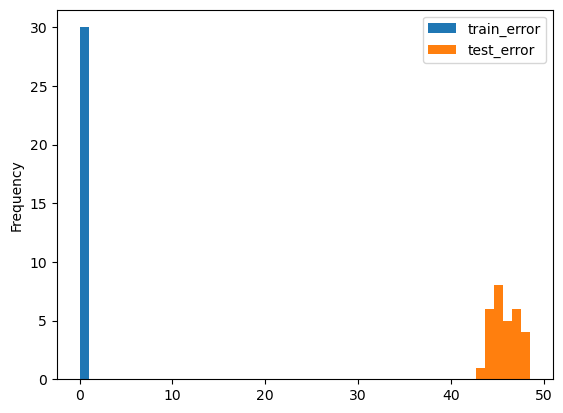

In [38]:
scores.plot.hist(bins=50)

## Validation curve

In [39]:
from sklearn.model_selection import validation_curve

In [57]:
max_depth = [5,6,7,8,9,10,11]

In [58]:
train_scores, test_scores = validation_curve(
    regressor,
    data,
    target,
    param_name = "max_depth",
    param_range = max_depth,
    cv = cv,
    scoring = "neg_mean_absolute_error",
    n_jobs = 2
)

In [59]:
train_errors, test_errors = -train_scores, -test_scores

In [60]:
train_errors

array([[50.84817461, 50.3008693 , 50.97584184, 51.15690999, 50.97481758,
        51.25364536, 50.68614799, 50.59374978, 51.24188929, 51.21908993,
        51.27564147, 50.66848911, 51.32652904, 50.91185848, 51.17813592,
        50.58138607, 50.9714361 , 50.65444718, 51.11117973, 50.7553874 ,
        51.54678124, 51.03735122, 50.92271957, 50.53415115, 51.25689193,
        51.42686229, 51.01828986, 51.18248309, 51.53056472, 51.03005432],
       [47.62675182, 46.3237105 , 47.60688274, 47.96935659, 48.1681555 ,
        47.91287275, 47.26002118, 46.52154392, 47.70096219, 47.96315198,
        47.90875035, 46.57029301, 47.73104718, 47.56380511, 47.56958795,
        47.42188216, 47.33003472, 47.43023509, 47.50703719, 47.33702982,
        47.95258787, 47.5310923 , 46.7155588 , 46.65128272, 47.4873852 ,
        47.78597877, 46.67484134, 47.83253964, 48.14224618, 47.91847775],
       [44.05462198, 42.66549523, 43.81809819, 44.11997753, 44.66372303,
        44.33713302, 43.95423709, 43.02198106, 44

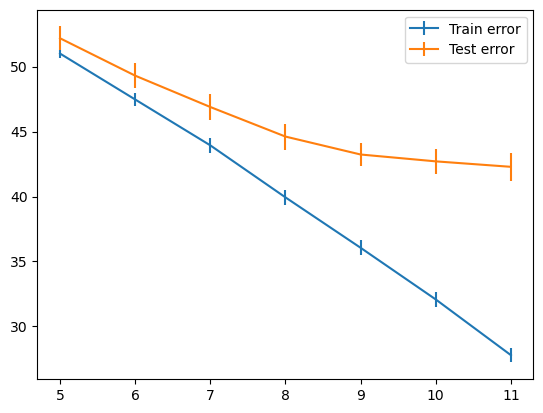

In [61]:
plt.errorbar(max_depth, train_errors.mean(axis = 1),
            yerr=train_errors.std(axis = 1), label="Train error")
plt.errorbar(max_depth, test_errors.mean(axis=1),
            yerr=test_errors.std(axis=1), label = "Test error")
plt.legend()
            

## Learning curve

In [68]:
import numpy as np
train_sizes = np.linspace(0.1, 1.0,num=5,endpoint=True)

In [69]:
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [71]:
cv = ShuffleSplit(n_splits=30, test_size=0.2)

In [72]:
from sklearn.model_selection import learning_curve

In [75]:
results = learning_curve(
    regressor,
    data,
    target,
    train_sizes=train_sizes,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=2
)

In [78]:
train_size, train_scores, test_scores = results[:3]

In [82]:
train_errors, test_errors = -train_scores, -test_scores

Text(0, 0.5, 'Mean absolute error, thousands $')

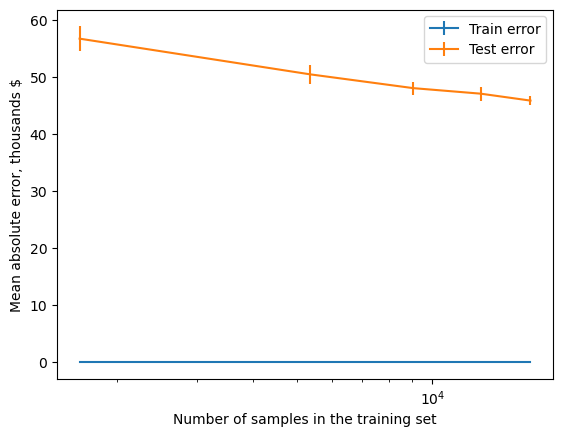

In [91]:
plt.errorbar(train_size, train_errors.mean(axis=1),
            yerr=train_errors.std(axis=1), label="Train error"
            )
plt.errorbar(train_size, test_errors.mean(axis=1),
            yerr=test_errors.std(axis=1), label="Test error")
plt.legend()
plt.xscale("log")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Mean absolute error, thousands $")